<a href="https://colab.research.google.com/github/ma850419/Flexible_Net/blob/main/Copy_of_Another_copy_of_wheat_samples_20june2024_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#selecting right points for wheat and others
import pandas as pd
import numpy as np
import glob,os
from pandas import DataFrame
import requests
def handle_err(err):
    err = "wrong path"
    print(err)
path=  'C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/samples/'
#files = os.listdir(listfiles)
os.chdir(path)
#print(files)
#file_name = 'C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/pointssamples_L7_L8_2014_Noequations_Transposed.xlsx'
i=0

for fl in glob.glob('*.xlsx'):
    # for pandas version >= 0.21.0
    filename = path + fl
    sheet_to_df_map = pd.read_excel(filename, sheet_name='Sheet1')
    lengt = len(sheet_to_df_map.columns)
    names = []
    print(lengt)
    for i in range(lengt):
        prts= str(sheet_to_df_map.columns[i]).split(" ")
        names.append(prts[0])
    names.append('Label')
    X= np.array(sheet_to_df_map)
    #print(X.shape)
    i=i+1
    #print(sheet_to_df_map.head(0))
    #print(X[:,0])
    Y= np.zeros((X.shape[0],X.shape[1]))
    #print(Y.shape)
    Y = X.copy()
    out = np.zeros((Y.shape[0],2)).astype('int')
    lmt = Y.shape[1]-2
    for j in range(Y.shape[0]):
        idx = np.argmax(Y[j,:lmt])
        idx1 = np.argmin(Y[j,:lmt])
        out[j,0]=idx
        out[j,1]=idx1
    type_ = np.zeros((Y.shape[0],1)).astype('int')
    lmt1 = (lmt/2)
    lmt2 = lmt
    counter = np.zeros(3).astype('int')
    for j in range(out.shape[0]):
    #if((out[j,0] >= 3 and out[j,0] <= 7) and (out[j,1] > 7 and out[j,1]< 12) and (Y[out[j,0],j]>0 and Y[out[j,1],j]>0) and (Y[out[j,0],j]>0.3 and Y[out[j,1],j]<= 0.15)):
    # for data without landsat 9
     if((out[j,0] >= lmt1-2  and out[j,1] >= lmt2-3 ) and (Y[j,out[j,0]]>0 and Y[j,out[j,1]]>0) and (Y[j,out[j,0]]>0.3 and Y[j,out[j,1]]<= 0.27)):
        type_[j,0]=1
        counter[0]+=1
     else:
        if(out[j,0] >= lmt2-2 and out[j,1] <= lmt1-1 and (Y[j,out[j,0]]>0 and Y[j,out[j,1]]>0) and (Y[j,out[j,0]]>0.4 and Y[j,out[j,1]]<= 0.15)):
            type_[j,0]=2
            counter[1]+=1
        else:
            type_[j,0]=3
            counter[2]+=1
    #converting selected point samples to their values from X
    print(counter)
    #Z = np.zeros((X.shape[1]+1,X.shape[0])).astype('float')
    Z = np.zeros((X.shape[0],X.shape[1]+1)).astype('float')
    #R = np.zeros((X.shape[1],X.shape[0])).astype('float')
    #R = X.transpose()
    k=0
    for j in range(type_.shape[0]):
        '''Z[0:X.shape[1],k] = R[:,j]
        Z[X.shape[1],k] = type_[j,0]
        k=k+1'''
        Z[k,0:X.shape[1]] = X[j,:]
        Z[k,X.shape[1]] = type_[j,0]
        k=k+1
    df = DataFrame(Z)
    prt1= fl.split("_")
    prt2 = prt1[len(prt1)-1].split(".")
    filename = path +'Wheat_points'+"_"+prt2[0] +".csv"
    mode = 'w'
    if  os.path.isfile(filename):
        print('file ', filename, 'exists')
        #os.remove(filename)
        #print(files)
    else:
        df.columns = names
        df.to_csv(filename, header = True,index=False)
        header = False



In [ ]:
#converting csv to shapefile

In [ ]:
import pandas as pd
import glob,os
import geopandas as gpd
import matplotlib.pyplot as plt
path=  'C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/samples/'
os.chdir(path)
newpath = path + 'shapefiles'
if os.path.exists(newpath):
    print('directory exists')
else:
    os.mkdir('shapefiles')
for fl in glob.glob('*.csv'):
    prt1 = fl.split(".")
    prt2 = path +"shapefiles/" + prt1[0]+".shp"
    if os.path.isfile(prt2):
         print('file ', prt2, 'exists')
    else:
        data = pd.read_csv(fl)
        ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'
        data_gdf = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['X'], data['Y']),crs=ESRI_WKT)
        #data_gdf.crs = {'epsg:4326'}
        data_gdf.to_file(filename= prt2, driver = 'ESRI Shapefile')
    data_gdf.plot()

In [ ]:
# read field limits
import geopandas as gpd
fields = 'C:/Users/Dr. Mohamad Awad/Documents/Data/fieldlimits_polygons.shp'
fieldlimits = gpd.read_file(fields)

In [ ]:
# select field limits by sample points
import pandas as pd
import glob,os
import geopandas as gpd
import matplotlib.pyplot as plt
path=  'C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/samples/shapefiles/'
#fieldlimits.plot()
os.chdir(path)
newpath = path + 'selected_fields/'
if os.path.exists(newpath):
    print('directory exists')
else:
    os.mkdir('selected_fields')
#os.chdir('selected_fields')
for fl in glob.glob('*.shp'):
    prt1 = fl.split(".")
    prt2 = prt1[0].split('_')
    filename1 = newpath  +'selected_'+ prt2[2]+".shp"
    #print(filename)
    points = gpd.read_file(fl)
    #project points to the same projection as fieldlimits
    points_prj = points.to_crs('EPSG:32636')
    #select points by attributes
    sel_points_prj=points_prj[ points_prj['Label']==1]
    #sel_points_prj.plot()
    #select polygons by points
    subset = gpd.sjoin(fieldlimits, sel_points_prj, how='inner', predicate='contains')
    subset.to_file(filename= filename1, driver = 'ESRI Shapefile')

In [ ]:
os.chdir('C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/pointssamples/')

directory exists


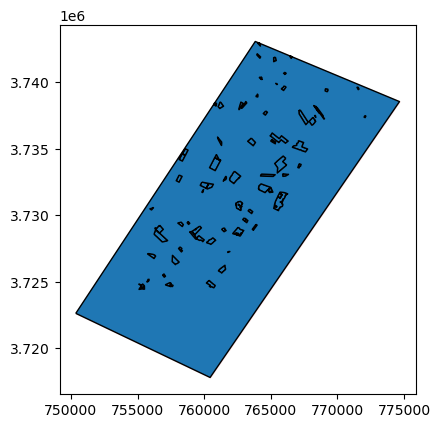

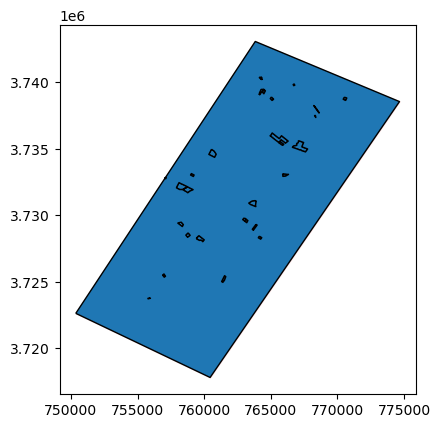

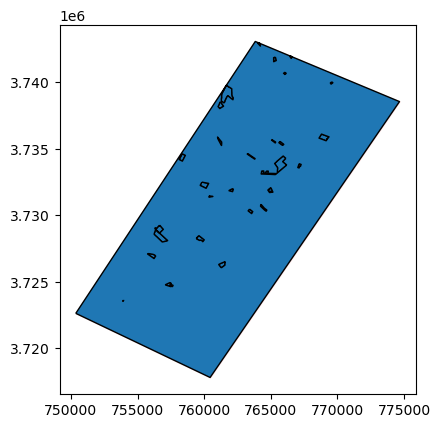

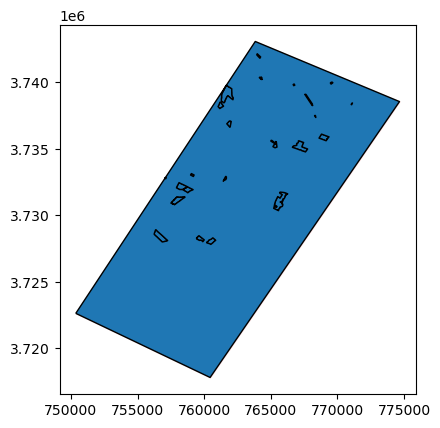

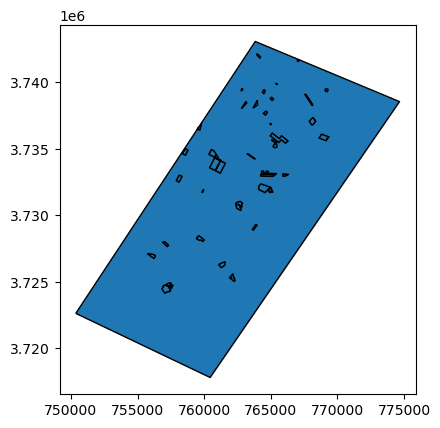

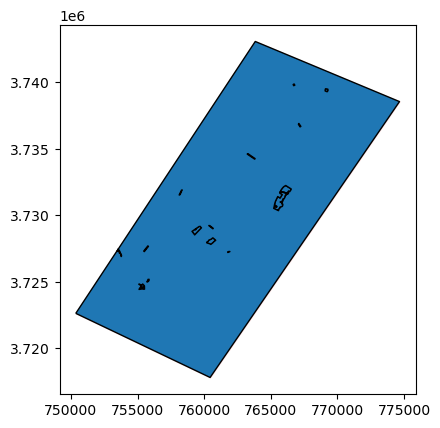

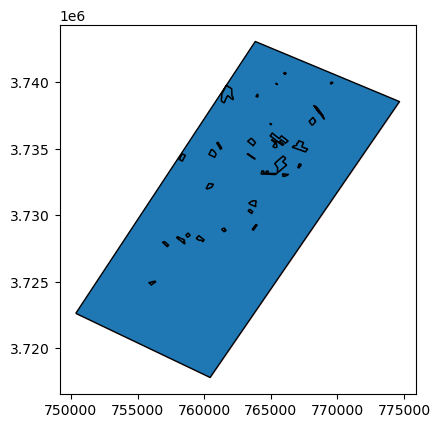

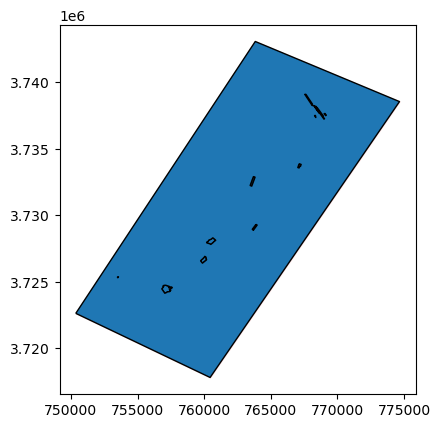

In [ ]:
from osgeo import ogr, gdal, osr
import glob,os, sys
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
border=  "G:/My Drive/borderjune11.shp"
path = 'C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/samples/shapefiles/selected_fields/'
bord = gpd.read_file(border)
os.chdir(path)
newpath = path + 'identity_border_fields/'
if os.path.exists(newpath):
    print('directory exists')
else:
    os.mkdir('identity_border_fields')
#os.chdir('selected_fields')
for fl in glob.glob('*.shp'):
    prt1 = fl.split(".")
    prt2 = prt1[0].split('_')
    filename1 = newpath  +'identity_border_fields_'+ prt2[1]+".shp"
    polys = gpd.read_file(fl)
    bord_prj = bord.to_crs('EPSG:32636')
    polys_clipped = polys.clip(bord_prj)
    polys_clipped_prj = polys_clipped.to_crs('EPSG:32636')
    #union_border_fields = gpd.pd.concat([polys_clipped_prj, bord_prj])
    identity_gdf = gpd.overlay( bord_prj,polys_clipped_prj,how = 'identity') # how='difference')
    identity_gdf.crs = 'EPSG:32636'
    #This now gives me the result I required:
    # Plot output over the top of input layers
    polys_clipped_prj.plot(alpha=0.1)
    bord_prj.plot(ax=plt.gca(), edgecolor='red', alpha=0.1)
    identity_gdf.plot(ax=plt.gca(), edgecolor='black')
    identity_gdf.to_file(filename1)


In [ ]:
# convert erased border to geotiff layer
import glob,os, sys
from osgeo import ogr, gdal, osr
reference = gdal.Open("C:/Sentinel_2_wheat/2017/NDVI_2017.tif")
path = 'C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/samples/shapefiles/selected_fields/identity_border_fields/'
os.chdir(path)
newpath = path + 'border_fields_to_raster/'
if os.path.exists(newpath):
    print('directory exists')
else:
    os.mkdir('border_fields_to_raster')
#os.chdir('selected_fields')
#reference_layer = reference.GetLayer()
x_min, xres, xskew, y_max, yskew, yres  = reference.GetGeoTransform()
x_max = x_min + (reference.RasterXSize * xres)
y_min = y_max + (reference.RasterYSize * yres)
for fl in glob.glob('*.shp'):
    prt1 = fl.split(".")
    prt2 = prt1[0].split('_')
    filename1 = newpath  +'mask_0_0_'+ prt2[3]+".tif"
    source_ds = ogr.Open(fl)
    source_layer = source_ds.GetLayer()
    #pixelWidth = pixelHeight = 10 # depending how fine you want your raster
    cols = int((x_max - x_min) / xres)
    rows = int((y_max - y_min) / abs(yres))
    print(rows,cols, x_min, x_max, y_min, y_max,xres,abs(yres))
    #print(me)
    target_ds = gdal.GetDriverByName('GTiff').Create(filename1, cols, rows, 1, gdal.GDT_Byte)
    target_ds.SetGeoTransform((x_min, xres, 0, y_min, 0,  abs(yres)))
    NoData_value = -999999
    target_dsSRS = osr.SpatialReference()
    target_dsSRS.ImportFromEPSG(32636)
    target_ds.SetProjection(target_dsSRS.ExportToWkt())
    gdal.RasterizeLayer(target_ds, [1], source_layer, options = ["ATTRIBUTE=Label"])
    target_ds=None


directory exists
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0
2522 2430 750360.0 774660.0 3717820.0 3743040.0 10.0 10.0


In [ ]:
os.chdir('c:/')

In [ ]:
import osgeo.osr as osr
import time
import matplotlib.pyplot as plt
from osgeo import gdal
import operator
def fromgdaltonumpytoimage(image, border,path, name,rowsdif,colsdif):
    # get the lat lon and add the ndvi


    '''geoTransform = image.GetGeoTransform()
    minx = geoTransform[0]
    maxy = geoTransform[3]
    maxx = minx + geoTransform[1] * image.RasterXSize
    miny = maxy + geoTransform[5] * image.RasterYSize
    print [minx, miny, maxx, maxy]
    data = None'''
    ncols = image.RasterXSize
    nrows= image.RasterYSize
    xs, ys = operator.itemgetter(1,5)(image.GetGeoTransform())
    band = image.GetRasterBand(1)
    arr = band.ReadAsArray()
    #arr = geemap.ee_to_numpy(image, region=border)
    print(ncols, nrows,ys,xs, arr.shape)
    # create an array with dimensions of image
    '''arr = np.zeros([nrows, ncols], np.int16) #-9999

    # fill the array with values
    counter =0
    for y in range(arr.shape[0]): #(0,len(arr[1])-1,1):
        for x in range(arr.shape[1]):#(0,len(arr[0])-1,1):
            if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
                counter+=1
                arr[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner'''
    #arr = arr.reshape((nrows,ncols))
    # in case you want to plot the image

    plt.imshow(arr[:,:])
    plt.show()
    image_re= np.pad(arr,((0,rowsdif),(0,colsdif )),'constant')
    plt.imshow(image_re[:,:])
    plt.show()
    # set the
    #SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    transform = image.GetGeoTransform()
    print(transform)
    # set the coordinate system
    target = osr.SpatialReference()
    target.ImportFromEPSG(32636)

    # set driver
    driver = gdal.GetDriverByName('GTiff')
    timestring = time.strftime("%Y%m%d_%H%M%S")
    print(timestring)
    file_name = path + "/" + name + '.tif'
    print(file_name)
    outputDataset = driver.Create(file_name,image_re.shape[1],image_re.shape[0], 1,gdal.GDT_Float32)#gdal.GDT_UInt16)

    # add some metadata
    outputDataset.SetMetadata( {'time': timestring, 'someotherInfo': 'testdata'} )

    outputDataset.SetGeoTransform(transform)
    outputDataset.SetProjection(target.ExportToWkt())
    #outputDataset.GetRasterBand(1).SetNoDataValue(-9999)
    #image_re=image_re.squeeze()
    #print(image_re.shape)
    #outputDataset.GetRasterBand(1).WriteArray(image_re)
    outputDataset.GetRasterBand(1).WriteArray(image_re)
    outputDataset.GetRasterBand(1).SetNoDataValue(-9999)
        #grid_data.GetRasterBand(i + 1).WriteArray(data[i])
        #outputDataset.GetRasterBand(i + 1).WriteArray(image_re[i])
    outputDataset.FlushCache()
    arr=None
    driver = None
    image = None
    image_re= None
    target = None

In [ ]:
import numpy as np
arr = [[1, 3],[5, 8]]
# padding array using 'minimum' mode
pad_arr = np.pad(arr, ((3,3),(1,1)), 'constant', constant_values=(1,2))
print(pad_arr)

[[1 1 1 2]
 [1 1 1 2]
 [1 1 1 2]
 [1 1 3 2]
 [1 5 8 2]
 [1 2 2 2]
 [1 2 2 2]
 [1 2 2 2]]


In [ ]:
import osgeo.osr as osr
import time
import matplotlib.pyplot as plt
from osgeo import gdal
import operator
def fromgdaltonumpytoimage2(image, border,path, name,rowsdif,colsdif):
    # get the lat lon and add the ndvi

    ncols = image.RasterXSize
    nrows= image.RasterYSize
    xs, ys = operator.itemgetter(1,5)(image.GetGeoTransform())
    arr = np.zeros([nrows, ncols,3], np.float32)
    for i in range(3):
        band = image.GetRasterBand(i+1)
        arr[:,:,i] = band.ReadAsArray()
    print(ncols, nrows,ys,xs, arr.shape)
    # create an array with dimensions of image
    #arr = arr.reshape((nrows,ncols))
    # in case you want to plot the image

    plt.imshow(arr[:,:,:])
    plt.show()
    image_re= np.pad(arr,((0,rowsdif),(0,colsdif )),'constant')
    plt.imshow(image_re[:,:,:])
    plt.show()
    # set the
    #SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    transform = image.GetGeoTransform()
    print(transform)
    # set the coordinate system
    target = osr.SpatialReference()
    target.ImportFromEPSG(32636)
    # set driver
    driver = gdal.GetDriverByName('GTiff')
    timestring = time.strftime("%Y%m%d_%H%M%S")
    print(timestring)
    file_name = path + "/" + name + '.tif'
    print(file_name)
    outputDataset = driver.Create(file_name,image_re.shape[1],image_re.shape[0], 3,gdal.GDT_Float32)#gdal.GDT_UInt16)

    # add some metadata
    outputDataset.SetMetadata( {'time': timestring, 'someotherInfo': 'testdata'} )

    outputDataset.SetGeoTransform(transform)
    outputDataset.SetProjection(target.ExportToWkt())
    for i in range(image_re.shape[2]):
        outputDataset.GetRasterBand(i + 1).WriteArray(image_re[:,:,i])
        outputDataset.GetRasterBand(i+1).SetNoDataValue(-9999)
    outputDataset.FlushCache()
    outputDataset = None
    arr=None
    driver = None
    image = None
    image_re= None
    target = None

In [ ]:
#download images from Google Engines
import geopandas as gpd
#import matplotlib.pyplot as plt
import ee
#import geemap
import folium
import os
#import numpy as np
#from osgeo import gdal
#import rasterio
#from rasterio.plot import show
#import requests
#import cv2
ee.Authenticate()
ee.Initialize(project='velvety-ring-328419')
BUCKET = 'mawad66'
shapefile = gpd.read_file("/content/drive/MyDrive/borderjune11.shp")
def coords_from_gpd(shape_in):
    return eval(shape_in.to_json())['features'][0]['geometry']['coordinates']
border =  ee.Geometry.Polygon(coords_from_gpd(shapefile))
coords=border['coordinates']
#clipped = collection.map(lambda image: image.clip(aoi))
def dateme(image, newlist):
  date = ee.Number.parse(image.date().format("YYYYMMdd"))
  newlist = ee.List(newlist)
  return ee.List(newlist.add(date).sort())
def clipme(image):
    return image.clip(border)
#loading to GEE - polygon cant be very complex it seems
def ndvi1(image, list):
    date = ee.Number.parse(image.date().format("YYYYMMdd"))
    #prts = ee.String(date).split('T')
    name = ee.String('NDVI_').cat(date.format())
    ndvi= image.normalizedDifference(['B8', 'B4']).rename(name).toDouble()
    ndvi = ndvi.copyProperties(image,['system:time_start','system:time_end'])
    return ee.List(list).add(ndvi)
def settime(image):
    return image.copyProperties(image,['system:time_start','system:time_end'])
dataset = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterDate('2019-03-15', '2019-07-15')
    .filter(ee.Filter.calendarRange(3,7,'month'))
    .filterMetadata('MGRS_TILE', 'equals', '36SYC')
    .filterBounds(border)
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',5))
    #.map(clipme)
    #.map(settime)
    #.map(ndvi1)
    #.select(['B8','B4','B3'])
    .select(['B8', 'B4', 'B3'])
)
pymd = dataset.iterate(dateme, ee.List([]))
ndvilist=[]
ndvilist = ee.ImageCollection(ee.List(dataset.iterate(ndvi1, ee.List([]))));
print('ndvilist', ee.ImageCollection(ndvilist).getInfo())
#print(ymd.getInfo())
ndvilist_sort = ndvilist.sort('system:time_start');
'''ndvi2imagelist=[]
ndvilist2imagelist = ee.ImageCollection(ee.List(ndvilist.iterate(phaseI, ee.List([]))))
collection_asImage =ee.ImageCollection(ndvilist2imagelist).toBands()
names = collection_asImage.bandNames()'''
#finalNDVI=[]
#finalNDVI = ee.ImageCollection(ee.List(names.iterate(phaseIII, ee.List([]))))
ndvi_sorted_image =ee.ImageCollection(ndvilist_sort).toBands()
#print("ndvilist after sort with name", finalNDVI.getInfo())
sz = ee.ImageCollection(ndvi_sorted_image).size()
inf = sz.getInfo()
print(inf)
print(ndvi_sorted_image.bandNames().getInfo())
list=ee.ImageCollection(ndvi_sorted_image).toList(sz)
#ndvilist.append(ndvi1(image))
map = folium.Map(location=[33.8, 35.8],zoom_start=7)
borderme = ee.FeatureCollection([ee.Feature(border,{'Name':'bekaa'})])
center_border = borderme.geometry().centroid().getInfo()['coordinates']
center_border.reverse()
mapid =borderme.draw(**{'color': 'FF0000', 'strokeWidth': 5}).getMapId()
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='border').add_to(map)
for i in range(inf):
  image=ee.Image(list.get(i)).toFloat()
  #date = image.date().format().getInfo()
  #prts = date.split('T')
  name1= 'NDVI_'+ str(i) + '_'+'2019' #prts[0]
  #Available band names: [0_NDVI_20170421, 1_NDVI_20170511, 2_NDVI_20170531, 3_NDVI_20170610, 4_NDVI_20170630, 5_NDVI_20170710].
  #Available band names: [0_NDVI_20200510, 1_NDVI_20200520, 2_NDVI_20200525, 3_NDVI_20200530, 4_NDVI_20200604, 5_NDVI_20200609, 6_NDVI_20200614, 7_NDVI_20200624, 8_NDVI_20200629, 9_NDVI_20200704, 10_NDVI_20200714].
  #[0_NDVI_20190511, 1_NDVI_20190526, 2_NDVI_20190531, 3_NDVI_20190610, 4_NDVI_20190625, 5_NDVI_20190705].
  # 2017-5% : Available band names: [0_NDVI_20170421, 1_NDVI_20170630, 2_NDVI_20170710].
  # 2019-5% :Available band names: [0_NDVI_20190511, 1_NDVI_20190610, 2_NDVI_20190625].
  mapid = image.getMapId({'bands': ['0_NDVI_20190511', '1_NDVI_20190610', '2_NDVI_20190625'], 'min': -0.5, 'max': 0.5})
  #print(me)
  folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='Ndvi'+ name1).add_to(map)
for r in range(len(coords)):
    pol = ee.Geometry.Polygon(coords[r])
    task = ee.batch.Export.image.toDrive(image.clip(border),
                                         description=name1,
                                         folder="Sentinel_2_wheat",
                                         region=border['coordinates'],
                                         scale=10,
                                         fileFormat='GeoTIFF',
                                         skipEmptyTiles=True)
    task.start()
map.add_child(folium.LayerControl())
display(map)

In [ ]:
# organize files in directories in local computer
import os
import numpy as np
from functools import reduce
import shutil
directory = r"/content/drive/MyDrive/Sentinel_2_wheat"
maskdirectory = r"/content/drive/MyDrive/masks/all"
def unique(list1):
    # Print directly by using * symbol
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    return ans
list1=[]
for path, folders, files in os.walk(directory):
    for filename in files:
        prts0 = filename.split('_')
        prts1 = prts0[2].split('.')
        #prts2 = prts1[0].split("-")
        list1.append(prts1[0])
unq=unique(list1)
newpath= directory + "/"
if os.path.exists(newpath):
    print('directory exists')
else:
    os.mkdir(newpath)
os.chdir(newpath)
for j in range(len(unq)):
    newpath1= newpath +"/" + unq[j]
    if os.path.exists(newpath1):
        print('directory exists')
    else:
        os.mkdir(newpath1)
    os.chdir(newpath)
    os.listdir()
for path, folders, files in os.walk(directory):
    for filename in files:
        prts0 = filename.split('_')
        prts1 = prts0[2].split('.')
        #prts2 = prts1[0].split("-")
        source = directory+ "/" + filename
        destination= newpath + "/" +prts1[0] + "/" + filename
        shutil.move(source,destination)
for path, folders, files in os.walk(maskdirectory):
    for filename in files:
        prts0 = filename.split('.')
        prts1 = prts0[0].split('_')
        print(filename)
        #os.chdir(newpath)
        newpath1=  newpath + "/" + prts1[1] + "/"
        print(newpath1)
        if not os.path.isdir(newpath1):
            print("directory does not exist")
        else:
            source = maskdirectory+ "/" + filename
            destination= newpath1
            shutil.move(source,destination)
#os.chdir("c:/")
#shutil.rmtree(newpath)

directory exists
directory exists
directory exists
mask_2019.tif
/content/drive/MyDrive/Sentinel_2_wheat//2019/
mask_2017.tif
/content/drive/MyDrive/Sentinel_2_wheat//2017/


In [ ]:
import os
os.chdir('/content/minefor testing')

In [ ]:
os.chdir("c:/")

In [ ]:
!unzip '/content/minefor testing/mask_2020.zip'

Archive:  /content/minefor testing/mask_2020.zip
  inflating: mask_2017.tif           
  inflating: mask_2018.tif           
  inflating: mask_2019.tif           
  inflating: mask_2020.tif           


In [ ]:
!pip install gdal2tiles

     ---------------------------------------- 0.0/201.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/201.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/201.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/201.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/201.9 kB ? eta -:--:--
     ----------- ------------------------- 61.4/201.9 kB 233.8 kB/s eta 0:00:01
     ----------- ------------------------- 61.4/201.9 kB 233.8 kB/s eta 0:00:01
     ----------- ------------------------- 61.4/201.9 kB 233.8 kB/s eta 0:00:01
     --------------------- -------------- 122.9/201.9 kB 327.4 kB/s eta 0:00:01
     --------------------- -------------- 122.9/201.9 kB 327.4 kB/s eta 0:00:01
     --------------------- -------------- 122.9/201.9 kB 327.4 kB/s eta 0:00:01
     --------------------- -------------- 122.9/201.9 kB 327.4 kB/s eta 0:00:01
     ------------------------------- ---- 174.1/201.9 kB 317.5 kB/s eta

In [2]:
from osgeo import gdal
import os

def create_tiles(tile_size, input_filename, in_path,out_path):
  ds = gdal.Open(in_path + input_filename)
  band = ds.GetRasterBand(1)
  output_filename = 'tile_'
  xsize, ysize = (band.XSize, band.YSize)
  tile_size_x, tile_size_y = tile_size
  tile_list = {}
  complete_x = xsize // tile_size_x
  complete_y = ysize // tile_size_y
  residue_x = xsize % tile_size_x
  residue_y = ysize % tile_size_y

  # for part A
  for i in range(complete_x):
    for j in range(complete_y):
        Xmin = i * tile_size_x
        Xmax = i * tile_size_x + tile_size_x - 1
        Ymin = j * tile_size_y
        Ymax = j * tile_size_y + tile_size_y - 1
        # do patch creation here
        com_string = "gdal_translate -of GTIFF -srcwin " + str(Xmin) + ", " + str(Ymin) + ", " + str(
            tile_size_x) + ", " + str(tile_size_y) + " " + \
                     str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(
            Xmin) + "_" + str(Ymin) + ".tif"
        os.system(com_string)

  x_residue_count = 1
  y_residue_count = 1
  # for part B
  for j in range(complete_y):
    Xmin = tile_size_x * complete_x
    Xmax = tile_size_x * complete_x + residue_x - 1
    Ymin = j * tile_size_y
    Ymax = j * tile_size_y + tile_size_y - 1
    # do patch creation here
    com_string = "gdal_translate -of GTIFF -srcwin " + str(Xmin) + ", " + str(Ymin) + ", " + str(
        residue_x) + ", " + str(tile_size_y) + " " + \
                 str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(
        Xmin) + "_" + str(Ymin) + ".tif"
    os.system(com_string)

# for part C
  for i in range(complete_x):
    Xmin = i * tile_size_x
    Xmax = i * tile_size_x + tile_size_x - 1
    Ymin = tile_size_y * complete_y
    Ymax = tile_size_y * complete_y + residue_y - 1
    com_string = "gdal_translate -of GTIFF -srcwin " + str(Xmin) + ", " + str(Ymin) + ", " + str(
        tile_size_x) + ", " + str(residue_y) + " " + \
                 str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(
        Xmin) + "_" + str(Ymin) + ".tif"
    os.system(com_string)

# for part D
  Xmin = complete_x * tile_size_x
  Ymin = complete_y * tile_size_y
  com_string = "gdal_translate -of GTIFF -srcwin " + str(Xmin) + ", " + str(Ymin) + ", " + str(
    residue_x) + ", " + str(residue_y) + " " + \
             str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(
    Xmin) + "_" + str(Ymin) + ".tif"
  os.system(com_string)

In [ ]:
#Modified to remove padding - No padding
import geopandas as gpd
import ee
import matplotlib.pyplot as plt
import geemap
import folium
import os
import psutil
import numpy as np
import pickle
from osgeo import gdal
import gdal2tiles
ee.Authenticate()
ee.Initialize(project='velvety-ring-328419')
path ="c:/sentinel_2_wheat"   # "/content/drive/MyDrive/Sentinel_2_wheat"
tile_size_x = 512
tile_size_y = 512
tile_size = 512
shapefile = gpd.read_file("G:/My Drive/borderjune11.shp")     #"/content/drive/MyDrive/borderjune11.shp")
def coords_from_gpd(shape_in):
    return eval(shape_in.to_json())['features'][0]['geometry']['coordinates']
border =  ee.Geometry.Polygon(coords_from_gpd(shapefile))
for subdirs, dirs, files in os.walk(path):
    # Open file
    for filename in files:
        with open(os.path.join(subdirs, filename)) as f:
            print(filename)
            print(subdirs)
            #print(me)
            prts = filename.split('_')
            prts2 = prts[1].split('.')
            prts1=filename.split(".")
            print(prts1[0])
            if prts[0] == "NDVI":
                print("I am in NDVI")
                os.chdir(subdirs)
                newpath = subdirs
                #in_path=newpath + "/" + filename
                in_path=newpath + "/"
                print(in_path)
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                print(newpath)
                print(f.name)
                #image2 = gdal.Open(f.name)#, GA_ReadOnly)
                xsize= image2.RasterXSize
                ysize = image2.RasterYSize
                print('NDVI',xsize,ysize)
                print(os.getcwd())
                #outputpath = newpath + "/"+ "satellite_tiles"
                out_path = newpath + "/"+ "satellite_tiles"
                if os.path.exists(outputpath):
                    print('directory exists')
                else:
                    os.mkdir(outputpath)
                m=0
                os.chdir(outputpath)
                out_path = os.getcwd()
                output_filename = 'tile_'
                create_tiles(tile_size, f.name, in_path,out_path)
                '''for i in range(0, xsize, tile_size_x):
                    for j in range(0, ysize, tile_size_y):
                        com_string = "gdal_translate -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path)  + " " + str(out_path) +"/" +  str(output_filename)+ str(i) + "_" + str(j) + "_"+ str(m)+ "_"+ str(prts2[0])+".tif"
                        #print(com_string)
                        os.system(com_string)
                        m=m+1'''
                com_string=None
                image2=None

            elif prts[0] == "mask":
                print("I am in mask")
                os.chdir(subdirs)
                newpath = subdirs
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                #in_path1=newpath + "/" + prts1[0] + ".tif"
                #outputpath1=newpath + "/"+ "mask_tiles"
                in_path1=newpath + "/"
                out_path1=newpath + "/"+ "mask_tiles"
                if os.path.exists(outputpath1):
                    print('directory exists')
                else:
                    os.mkdir(outputpath1)
                os.chdir(newpath)
                os.chdir(outputpath1)
                out_path1 = os.getcwd()
                output_filename1 = 'mask_tile_'
                os.chdir(newpath)
                print(newpath)
               #masked = gdal.Open(f.name)#, GA_ReadOnly)
                xsize= masked.RasterXSize
                ysize = masked.RasterYSize
                print('mask',xsize,ysize)
                create_tiles(tile_size, f.name, in_path1,out_path1)
                '''m=0
                #swith open('script.sh', 'w') as file:
                for i in range(0, xsize, tile_size_x):
                  for j in range(0, ysize, tile_size_y):
                    com_string = "gdal_translate -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path1)  + " " + str(out_path1) +"/" +  str(output_filename1)+ str(i) + "_" + str(j) + "_"+ str(m)+ "_"+ str(prts2[0])+".tif"
                    #file.write(com_string)
                    #print(com_string)
                    os.system(com_string)
                    m=m+1'''
                #options = {'zoom': (7, 9), 'resume': True}
                #gdal2tiles.generate_tiles(in_path1,  out_path1)#, **options)
                com_string=None
                masked=None
                #!bash script.sh
            else:
                print("this is not either a satellite or mask image!")

mask_0_0_2017.tif
c:/sentinel_2_wheat\2017
mask_0_0_2017
I am in mask
directory exists
c:/sentinel_2_wheat\2017
mask 2430 2522
Generating Base Tiles:
0...10...20...30...40...50...60...70...80...90...100
Generating Overview Tiles:
0...10...20...30...40...50...60...70...80...90...100
NDVI_0_2017.tif
c:/sentinel_2_wheat\2017
NDVI_0_2017
I am in NDVI
c:/sentinel_2_wheat\2017/NDVI_0_2017.tif
directory exists
c:/sentinel_2_wheat\2017
c:/sentinel_2_wheat\2017\NDVI_0_2017.tif
NDVI 2430 2522
c:\sentinel_2_wheat\2017
Generating Base Tiles:
0...10...20...30...40...50...60...70...80...90...100
Generating Overview Tiles:
0...10...20...30...40...50...60...70...80...90...100
mask_0_0_2019.tif
c:/sentinel_2_wheat\2019
mask_0_0_2019
I am in mask
directory exists
c:/sentinel_2_wheat\2019
mask 2430 2522
Generating Base Tiles:
0...10...20...30...40...50...60...70...80...90...100
Generating Overview Tiles:
0...10...20...30...40...50...60...70...80...90...100
NDVI_0_2019.tif
c:/sentinel_2_wheat\2019
NDVI_0_

mask_0_0_2017.tif
c:/sentinel_2_wheat\2017
mask_0_0_2017
I am in mask
directory exists
directory exists
c:/sentinel_2_wheat\2017
I am in masked 2560 2560
38 130
2430 2522 10.0 10.0 (2522, 2430)


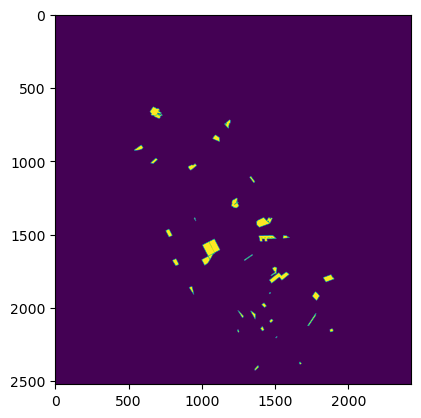

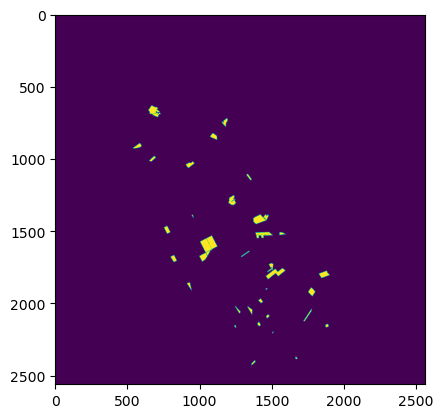

(750360.0, 10.0, 0.0, 3717820.0, 0.0, 10.0)
20240619_133238
c:/sentinel_2_wheat\2017/mask_0_0_2017.tif
NDVI_0_2017.tif
c:/sentinel_2_wheat\2017
NDVI_0_2017
I am in NDVI
c:/sentinel_2_wheat\2017/NDVI_0_2017.tif
directory exists
c:/sentinel_2_wheat\2017
c:/sentinel_2_wheat\2017\NDVI_0_2017.tif
I am in image : NDVI_0_2017.tif 2560 2560
38 130
c:\sentinel_2_wheat\2017
2430 2522 -10.0 10.0 (2522, 2430, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Dr. Mohamad Awad\.conda\envs\ee\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


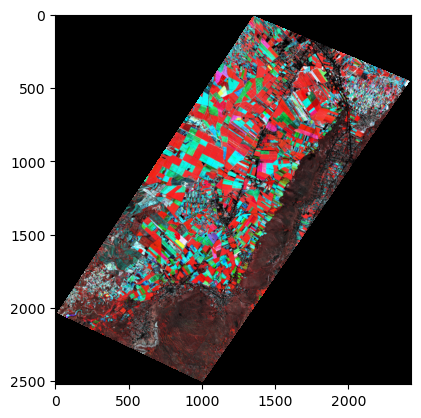

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (3,2)

In [ ]:
import geopandas as gpd
import ee
import matplotlib.pyplot as plt
import geemap
import folium
import os
import psutil
import numpy as np
import pickle
from osgeo import gdal
ee.Authenticate()
ee.Initialize(project='velvety-ring-328419')
path ="c:/sentinel_2_wheat"   # "/content/drive/MyDrive/Sentinel_2_wheat"
tile_size_x = 512
tile_size_y = 512
shapefile = gpd.read_file("G:/My Drive/borderjune11.shp")     #"/content/drive/MyDrive/borderjune11.shp")
def coords_from_gpd(shape_in):
    return eval(shape_in.to_json())['features'][0]['geometry']['coordinates']
border =  ee.Geometry.Polygon(coords_from_gpd(shapefile))
for subdirs, dirs, files in os.walk(path):
    # Open file
    for filename in files:
        with open(os.path.join(subdirs, filename)) as f:
            print(filename)
            print(subdirs)
            #print(me)
            prts = filename.split('_')
            prts2 = prts[1].split('.')
            prts1=filename.split(".")
            print(prts1[0])
            if prts[0] == "NDVI":
                print("I am in NDVI")
                os.chdir(subdirs)
                newpath = subdirs
                in_path=newpath + "/" + filename
                print(in_path)
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                print(newpath)
                print(f.name)
                image2 = gdal.Open(f.name)#, GA_ReadOnly)
                xsize= image2.RasterXSize
                ysize = image2.RasterYSize
                if ((xsize/tile_size_x)- int((xsize/tile_size_x))) > 0:
                   xsize2= ((int(xsize/tile_size_x)) +1)*tile_size_x
                else:
                   xsize2=xsize
                if ((ysize/tile_size_y)- int((ysize/tile_size_y))) > 0:
                   ysize2= ((int(ysize/tile_size_y)) +1)*tile_size_y
                else:
                   ysize2=ysize
                print("I am in image :",filename, xsize2,ysize2)
                rowsdif =  ysize2-ysize
                colsdif = xsize2-xsize
                print(rowsdif,colsdif)
                #print(me)
                print(os.getcwd())
                fromgdaltonumpytoimage2(image2,border,newpath,prts1[0],rowsdif,colsdif)
                outputpath = newpath + "/"+ "satellite_tiles"
                if os.path.exists(outputpath):
                    print('directory exists')
                else:
                    os.mkdir(outputpath)
                m=0
                os.chdir(outputpath)
                out_path = os.getcwd()
                output_filename = 'tile_'
                for i in range(0, xsize2, tile_size_x):
                    for j in range(0, ysize2, tile_size_y):
                        com_string = "gdal_translate -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path)  + " " + str(out_path) +"/" +  str(output_filename)+ str(i) + "_" + str(j) + "_"+ str(m)+ "_"+ str(prts2[0])+".tif"
                        #print(com_string)
                        os.system(com_string)
                        m=m+1
                com_string=None
                image2=None

            elif prts[0] == "mask":
                print("I am in mask")
                os.chdir(subdirs)
                newpath = subdirs
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                in_path1=newpath + "/" + prts1[0] + ".tif"
                outputpath1=newpath + "/"+ "mask_tiles"
                if os.path.exists(outputpath1):
                    print('directory exists')
                else:
                    os.mkdir(outputpath1)
                os.chdir(newpath)
                os.chdir(outputpath1)
                out_path1 = os.getcwd()
                output_filename1 = 'mask_tile_'
                os.chdir(newpath)
                print(newpath)
                masked = gdal.Open(f.name)#, GA_ReadOnly)
                xsize= masked.RasterXSize
                ysize = masked.RasterYSize
                if ((xsize/tile_size_x)- int((xsize/tile_size_x))) > 0:
                   xsize2= ((int(xsize/tile_size_x)) +1)*tile_size_x
                else:
                   xsize2=xsize
                if ((ysize/tile_size_y)- int((ysize/tile_size_y))) > 0:
                   ysize2= ((int(ysize/tile_size_y)) +1)*tile_size_y
                else:
                   ysize2=ysize
                print("I am in masked", xsize2,ysize2)
                rowsdif =  ysize2-ysize
                colsdif = xsize2-xsize
                print(rowsdif,colsdif)
                fromgdaltonumpytoimage(masked,border,newpath,prts1[0],rowsdif,colsdif)
                m=0
                #swith open('script.sh', 'w') as file:
                for i in range(0, xsize2, tile_size_x):
                  for j in range(0, ysize2, tile_size_y):
                    com_string = "gdal_translate -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path1)  + " " + str(out_path1) +"/" +  str(output_filename1)+ str(i) + "_" + str(j) + "_"+ str(m)+ "_"+ str(prts2[0])+".tif"
                    #file.write(com_string)
                    #print(com_string)
                    os.system(com_string)
                    m=m+1
                com_string=None
                masked=None
                #!bash script.sh
            else:
                print("this is not either a satellite or mask image!")

In [ ]:
#modified above codes for splitter to tiles
import geopandas as gpd
import ee
import matplotlib.pyplot as plt
import geemap
import folium
import os
import psutil
import numpy as np
import pickle
from osgeo import gdal
ee.Authenticate()
ee.Initialize(project='velvety-ring-328419')
path = "c:\\satellite_data\\"
tile_size_x = 512
tile_size_y = 512
shapefile = gpd.read_file("C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/pointssamples/bordermay20.shp")
def coords_from_gpd(shape_in):
    return eval(shape_in.to_json())['features'][0]['geometry']['coordinates']
border =  ee.Geometry.Polygon(coords_from_gpd(shapefile))
for subdirs, dirs, files in os.walk(path):
    # Open file
    for filename in files:
        with open(os.path.join(subdirs, filename)) as f:
            print(filename)
            print(subdirs)
            prts = filename.split('_')
            prts2 = prts[3].split('.')
            prts1=filename.split(".")
            print(prts1[0])
            if prts[0] == "Sentinel":
                print("I am in sentinel")
                os.chdir(subdirs)
                newpath = subdirs+"/" + prts1[0]
                in_path= subdirs + "/" + filename
                print(in_path)
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                print(newpath)
                print(f.name)
                image2 = gdal.Open(f.name)#, GA_ReadOnly)
                xsize= image2.RasterXSize
                ysize = image2.RasterYSize
                if ((xsize/tile_size_x)- int((xsize/tile_size_x))) > 0:
                   xsize2= ((int(xsize/tile_size_x)) +1)*tile_size_x
                else:
                   xsize2=xsize
                if ((ysize/tile_size_y)- int((ysize/tile_size_y))) > 0:
                   ysize2= ((int(ysize/tile_size_y)) +1)*tile_size_y
                else:
                   ysize2=ysize
                print("I am in image 2", xsize2,ysize2)
                rowsdif =  ysize2-ysize
                colsdif = xsize2-xsize
                print(rowsdif,colsdif)
                print(os.getcwd())
                fromgdaltonumpytoimage2(image2,border,newpath,prts1[0],rowsdif,colsdif)
                outputpath = "satellite_tiles"
                if os.path.exists(outputpath):
                    print('directory exists')
                else:
                    os.mkdir(outputpath)
                m=0
                os.chdir(outputpath)
                out_path = os.getcwd()
                output_filename = 'tile_'
                for i in range(0, xsize2, tile_size_x):
                    for j in range(0, ysize2, tile_size_y):
                        com_string = "gdal_translate  -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path)  + " " + str(out_path) +"\\" +  str(output_filename)+ str(i) + "_" + str(j) + "_"+ str(m)+"_" + str(prts2[0]) + ".tif"
                        print(com_string)
                        os.system(com_string)
                        m=m+1
                com_string=None
                image2=None

            elif prts[0] == "mask":
                print("I am in mask")
                os.chdir(subdirs)
                newpath = subdirs+ "/" + prts1[0]
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                in_path1=subdirs + "/" + prts1[0] + ".tif"
                outputpath1= "mask_tiles"
                if os.path.exists(outputpath1):
                    print('directory exists')
                else:
                    os.mkdir(outputpath1)
                os.chdir(newpath)
                os.chdir(outputpath1)
                out_path1 = os.getcwd()
                output_filename1 = 'mask_tile_'
                os.chdir(newpath)
                print(newpath)
                masked = gdal.Open(f.name)#, GA_ReadOnly)
                xsize= masked.RasterXSize
                ysize = masked.RasterYSize
                if ((xsize/tile_size_x)- int((xsize/tile_size_x))) > 0:
                   xsize2= ((int(xsize/tile_size_x)) +1)*tile_size_x
                else:
                   xsize2=xsize
                if ((ysize/tile_size_y)- int((ysize/tile_size_y))) > 0:
                   ysize2= ((int(ysize/tile_size_y)) +1)*tile_size_y
                else:
                   ysize2=ysize
                print("I am in masked", xsize2,ysize2)
                rowsdif =  ysize2-ysize
                colsdif = xsize2-xsize
                print(rowsdif,colsdif)
                fromgdaltonumpytoimage(masked,border,newpath,prts1[0],rowsdif,colsdif)
                m=0
                for i in range(0, xsize2, tile_size_x):
                    for j in range(0, ysize2, tile_size_y):
                        com_string = "gdal_translate  -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path1)  + " " + str(out_path1) +"\\" +  str(output_filename1)+ str(i) + "_" + str(j) + "_"+ str(m)+ "_" + str(prts2[0]) +".tif"
                        print(com_string)
                        os.system(com_string)
                        m=m+1
                com_string=None
                masked=None
            else:
                print("this is not either a satellite or mask image!")

In [ ]:
import geopandas as gpd
import ee
import matplotlib.pyplot as plt
import geemap
import folium
import os
import psutil
import numpy as np
import pickle
ee.Authenticate()
ee.Initialize(project='velvety-ring-328419')
from osgeo import gdal
from oauth2client import file
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
print(folium.__version__)
SCOPES = ['https://www.googleapis.com/auth/drive']
#from google.colab import drive

#drive.mount('/content/gdrive')
shapefile = gpd.read_file("C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/pointssamples/bordermay20.shp")
#mask = r'C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/pointssamples/newmask_31may.tif'
def coords_from_gpd(shape_in):
    return eval(shape_in.to_json())['features'][0]['geometry']['coordinates']
border =  ee.Geometry.Polygon(coords_from_gpd(shapefile))
coords=border['coordinates']
directory = r"G:\My Drive\Sentinel_2_wheat"
# Iterate over files in directory
tile_size_x = 512
tile_size_y = 512
creds = None
credentials = "C:/Users/Dr. Mohamad Awad/Documents/Zahwa_Madi_Files/credentials.json"

if os.path.exists('token.pickle'):
    with open('token.pickle', 'rb') as token:
        creds = pickle.load(token)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(credentials, SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.pickle', 'wb') as token:
        pickle.dump(creds, token)

service = build('drive', 'v3', credentials=creds)
def findId( filename):
    DRIVE_ID = '15gsVIeBflBFVOPBMYYWL7ta5MLLHjn7D'
    page_token = None
    while True:
        response = service.files().list(corpora = 'drive',
                driveId = DRIVE_ID,q="name = '"+ filename +"'",spaces='drive',fields='nextPageToken, files(id, name)',pageToken=page_token,includeItemsFromAllDrives = True,
                supportsAllDrives= True).execute()
        for file in response.get('files', []):
            print('Found file: %s (%s)' % (file.get('name'), file.get('id')))
        page_token = response.get('nextPageToken', None)
        if page_token is None:
            break
for path, folders, files in os.walk(directory):
    # Open file
    for filename in files:
        with open(os.path.join(directory, filename)) as f:
            prts = filename.split('_')
            prts2 = prts[3].split('.')
            prts1=filename.split(".")
            print(prts1[0])
            if prts[0] == "Sentinel":
                path = 'C:/'
                os.chdir(path)
                newpath = path + prts1[0]
                in_path=newpath + "/" + filename
                print(in_path)
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                print(newpath)
                print(f.name)
                image2 = gdal.Open(f.name)#, GA_ReadOnly)
                '''band1 = image2.GetRasterBand(1) # Red channel
                band2 = image2.GetRasterBand(2) # Green channel
                band3 = image2.GetRasterBand(3) # Blue channel
                B1 = band1.ReadAsArray()
                B2 = band2.ReadAsArray()
                B3 = band3.ReadAsArray()
                image = np.dstack((B1, B2, B3))'''
                print("image2 size:::",image2.RasterXSize,image2.RasterYSize)
                xsize= image2.RasterXSize
                ysize = image2.RasterYSize
                if ((xsize/tile_size_x)- int((xsize/tile_size_x))) > 0:
                   xsize2= ((int(xsize/tile_size_x)) +1)*tile_size_x
                else:
                   xsize2=xsize1
                if ((ysize/tile_size_y)- int((ysize/tile_size_y))) > 0:
                   ysize2= ((int(ysize/tile_size_y)) +1)*tile_size_y
                else:
                   ysize2=ysize1
                print("I am in image 2", xsize2,ysize2)
                rowsdif =  ysize2-ysize
                colsdif = xsize2-xsize
                print(rowsdif,colsdif)
                print(os.getcwd())
                fromgdaltonumpytoimage2(image2,border,newpath,prts1[0],rowsdif,colsdif)
                outputpath = "satellite_tiles"
                if os.path.exists(outputpath):
                    print('directory exists')
                else:
                    os.mkdir(outputpath)
                m=0
                os.chdir(outputpath)
                out_path = os.getcwd()
                output_filename = 'tile_'
                for i in range(0, xsize2, tile_size_x):
                    for j in range(0, ysize2, tile_size_y):
                        com_string = "gdal_translate  -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path)  + " " + str(out_path) +"\\" +  str(output_filename)+ str(i) + "_" + str(j) + "_"+ str(m)+".tif"
                        print(com_string)
                        os.system(com_string)
                        m=m+1
                com_string=None
                image2=None
                del_response = service.files().delete(fileId=f.name['id'])
                print('del_response.body:')
                print( del_response.body)
                print('I will try to emptyTrash:')
                trash_response = service.files().emptyTrash()
            elif prts[0] == "mask":
                print('I am in mask")
                path = 'C:/'
                os.chdir(path)
                newpath = path + prts1[0]
                if os.path.exists(newpath):
                    print('directory exists')
                else:
                    os.mkdir(newpath)
                os.chdir(newpath)
                in_path1=newpath + "/" + prts1[0] + ".tif"
                outputpath1= "mask_tiles"
                if os.path.exists(outputpath1):
                    print('directory exists')
                else:
                    os.mkdir(outputpath1)
                os.chdir(newpath)
                os.chdir(outputpath1)
                out_path1 = os.getcwd()
                output_filename1 = 'mask_tile_'
                os.chdir(newpath)
                print(newpath)
                masked = gdal.Open(f.name)#, GA_ReadOnly)
                xsize= masked.RasterXSize
                ysize = masked.RasterYSize
                if ((xsize/tile_size_x)- int((xsize/tile_size_x))) > 0:
                   xsize2= ((int(xsize/tile_size_x)) +1)*tile_size_x
                else:
                   xsize2=xsize
                if ((ysize/tile_size_y)- int((ysize/tile_size_y))) > 0:
                   ysize2= ((int(ysize/tile_size_y)) +1)*tile_size_y
                else:
                   ysize2=ysize
                print("I am in masked", xsize2,ysize2)
                rowsdif =  ysize2-ysize
                colsdif = xsize2-xsize
                print(rowsdif,colsdif)
                fromgdaltonumpytoimage(masked,border,newpath,prts1[0],rowsdif,colsdif)
                m=0
                for i in range(0, xsize2, tile_size_x):
                    for j in range(0, ysize2, tile_size_y):
                        com_string = "gdal_translate  -srcwin " + str(i)+ "  " + str(j) + " " + str(tile_size_x) + " " + str(tile_size_y) + " " + str(in_path1)  + " " + str(out_path1) +"\\" +  str(output_filename1)+ str(i) + "_" + str(j) + "_"+ str(m)+".tif"
                        print(com_string)
                        os.system(com_string)
                        m=m+1
                com_string=None
                masked=None
                #findId(filename)
                '''del_response = service.files().delete(fileId=f['id'])
                print('del_response.body:')
                print( del_response.body)
                print('I will try to emptyTrash:')
                trash_response = service.files().emptyTrash()'''
                i=0
                for p in psutil.process_iter():
                    try:
                        i=i+1
                        #if "G:/My Drive/Sentinel_2_wheat/mask_2_0_2019-05-11.tif" in str(p.open_files()):
                        print(p.name())
                            #print("^^^^^^^^^^^^^^^^^")
                            #p.kill()
                    except:
                         continue
                print(i)
                os.remove("G:/My Drive/Sentinel_2_wheat/mask_2_0_2019-05-11.tif")
            else:
                print("this is not either a satellite or mask image!")



In [ ]:
shutil.rmtree('/content/minefor testing/2020/mask_2020', ignore_errors=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
